In [1]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
import scipy.stats as stats



In [2]:
def remove_outliers(df, column_name):
    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Define the upper threshold (4 to 5 times the mean)
    upper_threshold =40 * mean_value

    # Filter the data and keep only rows with values within the threshold
    filtered_df = df[df[column_name] <= upper_threshold]

    return filtered_df


In [3]:
dfMod_april = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_april = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_april = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfMod_may = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_may = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_may = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfAlp = pd.concat([dfAlp_april,dfAlp_may])
dfBet = pd.concat([dfBet_april,dfBet_may])
dfMod = pd.concat([dfMod_april,dfMod_may])

dfAlp.rename(columns={'timestamp_local':'Date'},inplace=True)
dfBet.rename(columns={'timestamp_local':'Date'},inplace=True)
dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
dfBet.rename(columns={'sample_temp':'temp'},inplace=True)
dfMod.index = dfMod.index.map(lambda x: x.replace(second=0))
dfAlp.index = dfAlp.index.map(lambda x: x.replace(second=0))
dfBet.index = dfBet.index.map(lambda x: x.replace(second=0))
common_timestamps = dfMod.index.intersection(dfAlp.index).intersection(dfBet.index)

# Filter each DataFrame to keep only the rows with common timestamps
dfMod = dfMod[dfMod.index.isin(common_timestamps)]
dfAlp = dfAlp[dfAlp.index.isin(common_timestamps)]
dfBet = dfBet[dfBet.index.isin(common_timestamps)]
print(len(dfMod), len(dfAlp), len(dfBet))


dfAlp = remove_outliers(dfAlp,'pm10')
dfBet = remove_outliers(dfBet,'pm10')
dfMod = remove_outliers(dfMod,'pm10')


OG_dfAlp = dfAlp.iloc[::-1]
OG_dfBet = dfBet.iloc[::-1]
OG_dfMod = dfMod.iloc[::-1]
print(.8*len(OG_dfAlp))

train_slice = slice(5000,int(.8*len(OG_dfAlp)))
test_slice = slice(int(.8*len(OG_dfAlp)),len(OG_dfMod))
train_dfAlp = OG_dfAlp[train_slice]
train_dfBet = OG_dfBet[train_slice]
train_dfMod = OG_dfMod[train_slice]

print(len(train_dfMod),len(train_dfAlp),len(train_dfBet))


78602 78603 78602
62760.0
57760 57760 57760


In [4]:
parameters = [
    {'name': 'rh', 'label': 'Relative Humidity', 'unit': '%'},
    {'name': 'pm1', 'label': 'PM\u2081', 'unit': 'µg/m\u00b3'},
    {'name': 'pm25', 'label': 'PM\u2082.\u2085', 'unit': 'µg/m\u00b3'},
    {'name': 'pm10', 'label': 'PM\u2081\u2080', 'unit': 'µg/m\u00b3'},
    {'name': 'temp', 'label': 'Temperature', 'unit': '°C'}
]

In [5]:
alpha_coefficients = {}
alpha_intercept = {}
beta_coefficients = {}
beta_intercept = {}
alpha_regressor = {}
beta_regressor = {}

for parameter in parameters[1:4]:
    train_dfAlp[parameter["name"]] = train_dfAlp[parameter["name"]].astype(float)
    train_dfAlp['temp'] = train_dfAlp['temp'].astype(float)
    train_dfAlp['rh'] = train_dfAlp['rh'].astype(float)

    # Define the independent variables and add a constant term for the intercept
    X = train_dfAlp[[parameter["name"],'temp', 'rh']]

    # Define the dependent variable
    y = train_dfMod[parameter["name"]]

    n_components = 1000  # Number of Gaussian components
    
# Create the Random Forest classifier
    alpha_regressor[parameter['name']] = GaussianMixture(n_components=n_components)

    # Train the classifier on the training data
    alpha_regressor[parameter['name']].fit(X, y)


    train_dfBet[parameter["name"]] = train_dfBet[parameter["name"]].astype(float)
    train_dfBet['temp'] = train_dfBet['temp'].astype(float)
    train_dfBet['rh'] = train_dfBet['rh'].astype(float)

    # Define the independent variables and add a constant term for the intercept
    X = train_dfBet[[parameter["name"],'temp', 'rh']]

    # Define the dependent variable
    y = train_dfMod[parameter["name"]]


# Create the Random Forest classifier
    beta_regressor[parameter['name']] =   GaussianMixture(n_components=n_components)

    # Train the classifier on the training data
    beta_regressor[parameter['name']].fit(X, y)





/tmp/ipykernel_9947/990617354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[parameter["name"]] = train_dfAlp[parameter["name"]].astype(float)
/tmp/ipykernel_9947/990617354.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp['temp'] = train_dfAlp['temp'].astype(float)
/tmp/ipykernel_9947/990617354.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [6]:
test_dfAlp = OG_dfAlp[test_slice]
test_dfBet = OG_dfBet[test_slice]
test_dfMod = OG_dfMod[test_slice]

for parameter in parameters[1:4]:
    test_dfAlp[parameter["name"]] = alpha_regressor[parameter["name"]].predict(test_dfAlp[[parameter["name"],"temp","rh"]])
    test_dfBet[parameter["name"]] = beta_regressor[parameter["name"]].predict(test_dfBet[[parameter["name"],"temp","rh"]])
    

/tmp/ipykernel_9947/3661398638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[parameter["name"]] = alpha_regressor[parameter["name"]].predict(test_dfAlp[[parameter["name"],"temp","rh"]])
/tmp/ipykernel_9947/3661398638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfBet[parameter["name"]] = beta_regressor[parameter["name"]].predict(test_dfBet[[parameter["name"],"temp","rh"]])
/tmp/ipykernel_9947/3661398638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

/tmp/ipykernel_9947/3314503709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

PM₁ P-Value Alpha: 0.0
PM₁ P-Value Beta: 0.0


/tmp/ipykernel_9947/3314503709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

PM₂.₅ P-Value Alpha: 0.0
PM₂.₅ P-Value Beta: 0.0


/tmp/ipykernel_9947/3314503709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_9947/3314503709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

PM₁₀ P-Value Alpha: 0.0
PM₁₀ P-Value Beta: 0.0


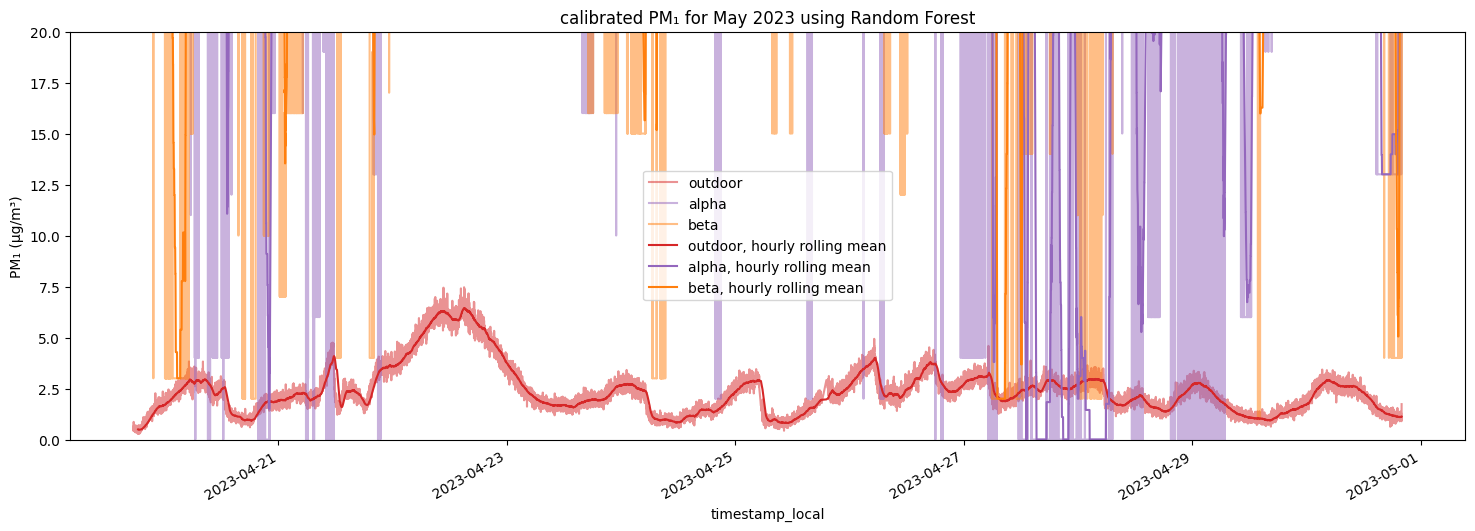

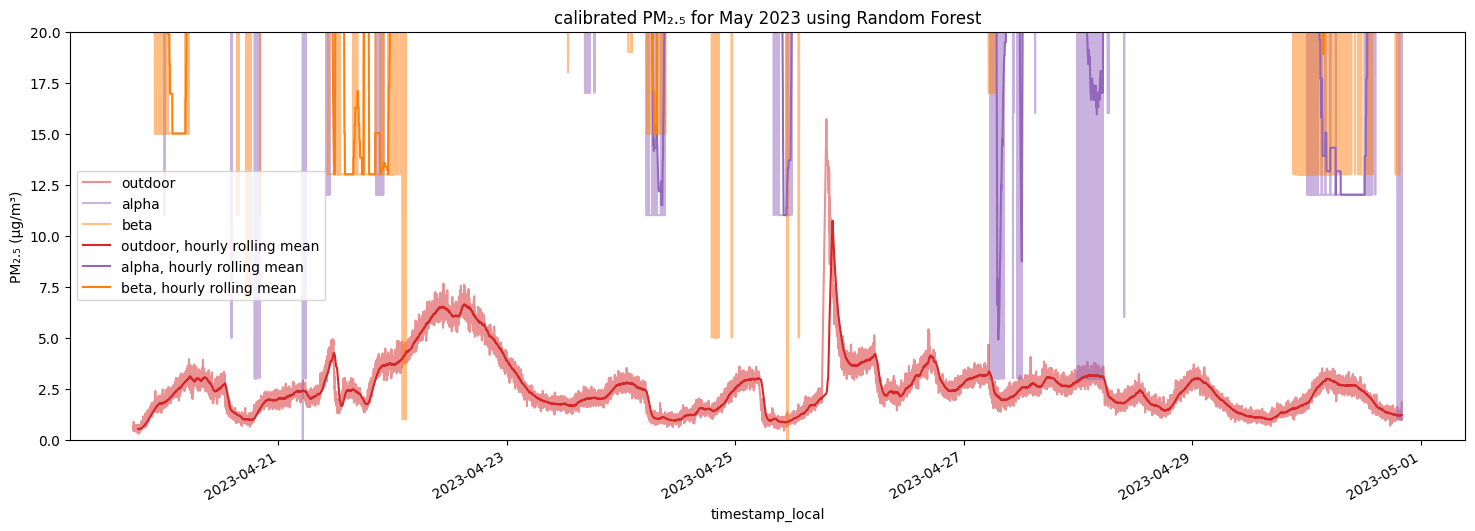

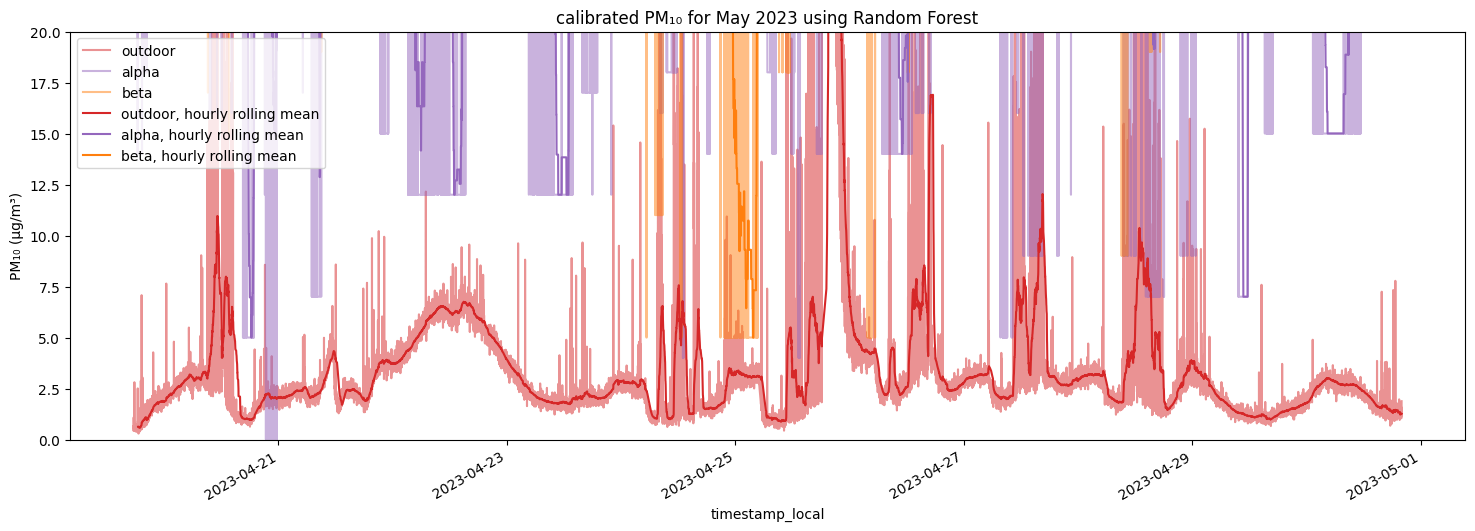

In [7]:
for parameter in parameters[1:4]:
    test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
    test_dfAlp[f'60 mean {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
    test_dfBet[f'60 mean {parameter["name"]}']=test_dfBet[parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'calibrated {parameter["label"]} for May 2023 using Random Forest')
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    plt.ylim(0, 20)

   

    test_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
    test_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
    test_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
    test_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    test_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    test_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()

    _, p_value_alpha = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfAlp[parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfBet[parameter["name"]], equal_var=False)

    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)

In [8]:
# new_dfAlp = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfBet = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfMod = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

# new_dfAlp = new_dfAlp.iloc[::-1]
# new_dfBet = new_dfBet.iloc[::-1]
# new_dfMod = new_dfMod.iloc[::-1]

# new_dfMod = remove_outliers(new_dfMod, 'pm10')
# new_dfAlp = remove_outliers(new_dfAlp, 'pm10')
# new_dfBet = remove_outliers(new_dfBet, 'pm10')
# # new_dfAlp = new_dfAlp[0:10000]
# # new_dfBet = new_dfBet[0:10000]
# # new_dfMod = new_dfMod[0:10000]

# # new_dfAlp = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfBet = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfMod = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]

# new_dfAlp.index = new_dfAlp.index.map(lambda x: x.replace(second=0))
# new_dfBet.index = new_dfBet.index.map(lambda x: x.replace(second=0))
# new_dfMod.index = new_dfMod.index.map(lambda x: x.replace(second=0))

# new_dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
# new_dfBet.rename(columns={'sample_temp':'temp'},inplace=True)

# common_timestamps = new_dfMod.index.intersection(new_dfAlp.index).intersection(new_dfBet.index)

# # Filter each DataFrame to keep only the rows with common timestamps
# new_dfMod = new_dfMod[new_dfMod.index.isin(common_timestamps)]
# new_dfAlp = new_dfAlp[new_dfAlp.index.isin(common_timestamps)]
# new_dfBet = new_dfBet[new_dfBet.index.isin(common_timestamps)]


In [9]:
# for parameter in parameters[1:4]:
#     new_dfMod[f'60 mean {parameter["name"]}']=new_dfMod[parameter['name']].rolling(60).mean()
#     new_dfAlp[f'60 mean {parameter["name"]}']=new_dfAlp[parameter['name']].rolling(60).mean()
#     new_dfBet[f'60 mean {parameter["name"]}']=new_dfBet[parameter['name']].rolling(60).mean()

#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.gcf().set_size_inches(18, 6)
#     plt.title(f'Uncalibrated {parameter["label"]} for May 2023')
#     plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
#     plt.xlabel('Time (days)')
#     plt.grid(True)
    

   

#     new_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
#     new_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
#     new_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
#     new_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
#     new_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
#     new_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
#     plt.legend()

#     _, p_value_alpha = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]], equal_var=False)
#     _, p_value_beta = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfBet[parameter["name"]], equal_var=False)

#     print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
#     print(f"{parameter['label']} P-Value Beta:", p_value_beta)



In [10]:
# for parameter in parameters[1:4]:
#     # Assuming new_dfAlp and new_dfBet are the dataframes containing new data for prediction

#     # Get the predicted values using Gaussian Mixture Regression for alpha parameter
#     new_dfAlp[parameter['name']] = alpha_clf[parameter['name']].predict(new_dfAlp[[parameter["name"],'temp', 'rh']])
#     # Convert the cluster assignments to predicted values
#     new_dfAlp[parameter['name']] = alpha_clf[parameter['name']].means_[new_dfAlp[parameter['name']].astype(int), 0]

#     # Get the predicted values using Gaussian Mixture Regression for beta parameter
#     new_dfBet[parameter['name']] = beta_clf[parameter['name']].predict(new_dfBet[[parameter["name"],'temp', 'rh']])
#     # Convert the cluster assignments to predicted values
#     new_dfBet[parameter['name']] = beta_clf[parameter['name']].means_[new_dfBet[parameter['name']].astype(int), 0]


In [11]:
# for parameter in parameters[1:4]:
#     new_dfMod[f'60 mean {parameter["name"]}']=new_dfMod[parameter['name']].rolling(60).mean()
#     new_dfAlp[f'60 mean {parameter["name"]}']=new_dfAlp[parameter['name']].rolling(60).mean()
#     new_dfBet[f'60 mean {parameter["name"]}']=new_dfBet[parameter['name']].rolling(60).mean()

#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.gcf().set_size_inches(18, 6)
#     plt.title(f'calibrated {parameter["label"]} for May 2023 for GMR')
#     plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
#     plt.xlabel('Time (days)')
#     plt.grid(True)
    

   

#     new_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
#     new_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
#     new_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
#     new_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
#     new_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
#     new_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
#     plt.legend()

#     _, p_value_alpha = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]], equal_var=False)
#     _, p_value_beta = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfBet[parameter["name"]], equal_var=False)

#     print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
#     print(f"{parameter['label']} P-Value Beta:", p_value_beta)

(array([2.31752133e-01, 2.16424051e-01, 6.15771290e-02, 3.19120690e-02,
        2.13428039e-02, 7.80778930e-03, 5.07657618e-03, 2.60259643e-03,
        1.52826884e-03, 1.97464439e-03, 2.38319150e-03, 1.67201689e-03,
        1.08189328e-03, 7.71700105e-04, 6.65780483e-04, 5.59860860e-04,
        4.16112802e-04, 3.48021616e-04, 2.34536306e-04, 2.57233368e-04,
        1.81576495e-04, 1.36182371e-04, 1.58879433e-04, 1.43748059e-04,
        1.58879433e-04, 1.21050997e-04, 7.56568730e-05, 9.07882476e-05,
        7.56568730e-05, 7.56568730e-05, 9.07882476e-05, 7.56568730e-05,
        9.07882476e-05, 6.80911857e-05, 4.53941238e-05, 4.53941238e-05,
        2.26970619e-05, 2.26970619e-05, 3.02627492e-05, 5.29598111e-05,
        7.56568730e-05, 3.78284365e-05, 5.29598111e-05, 3.02627492e-05,
        3.78284365e-05, 5.29598111e-05, 6.05254984e-05, 3.78284365e-05,
        2.26970619e-05, 2.26970619e-05, 3.02627492e-05, 2.26970619e-05,
        4.53941238e-05, 1.51313746e-05, 3.78284365e-05, 4.539412

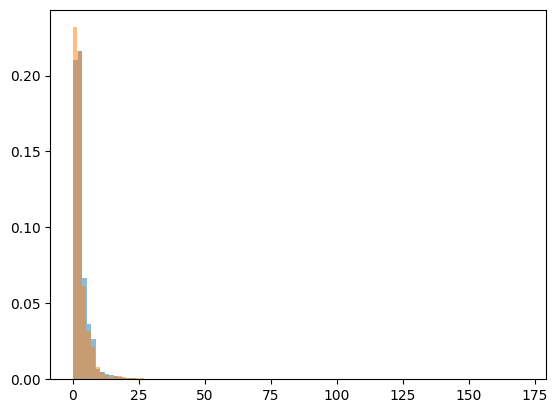

In [12]:
plt.hist(dfMod["pm10"], bins=100, density=True, alpha=0.5, label="Observed")
plt.hist(dfAlp["pm10"], bins=100, density=True, alpha=0.5, label="Alp")